# Cost Function 그리기


In [1]:
import numpy as np
import matplotlib.pyplot as plt


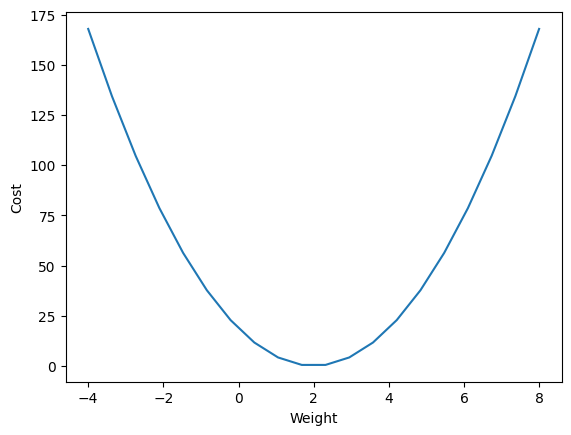

In [5]:
# Cost Function 정의
def MSE(w,x,y,b):
    s = 0 # 각 사례별 데이터의 오차 제곱합을 저장
    for i in range(len(x)):
        s += (y[i]- (w * x[i] + b)) ** 2
    return s / len(x)


# y = 2x + 0.1 모델 가정
x = [1.,2.,3.] # 입력변수, 독립변수, Feature
y = [2.1, 4.1, 6.1] # 출력변수 ,종속변수
b = 0.1

w_val = [] # 비용함수 그래프의 x축의 값
cost_val = [] # 비용함수 그래프의 y축의 값

for w in np.linspace(-4, 8, 20):
    c = MSE(w,x,y,b)
    w_val.append(w)
    cost_val.append(c)

plt.plot(w_val,cost_val)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

# 가중치 학습

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


-0.09027529589850945 0.17055522598064407


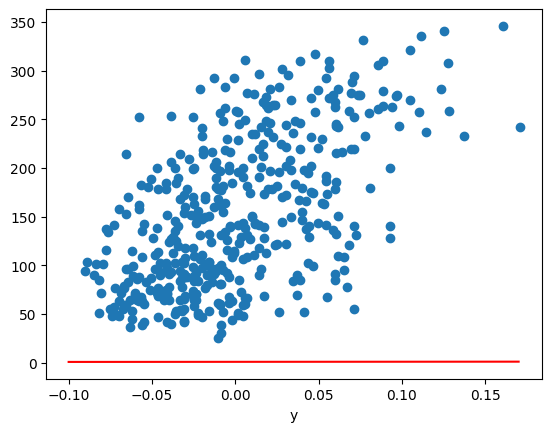

In [17]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

diabetes = load_diabetes()  # 당뇨병 환자 데이터 로드
# print(diabetes.DESCR)
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target # 베이스 라인 1년 후 질병 진행의 정량적 측정값
display(df.head())

### bmi와 target 값의 상관 관계 및 회귀 분석 ###
# 회귀선의 시작 값과 끝 값을 정하기위해 최소 최대 값을 확인


print(df['bmi'].min(),df['bmi'].max())
w = 1.0 # 초기 가중치
b = 1.0 # 초기 절편

pt1 = (-0.1,-0.1*w+b) # 회귀선의 시작 (x,y) 좌표
pt2 = (0.17,0.17*w+b) # 회귀선의 끝(x,y) 좌표

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.scatter(df['bmi'],df['target'])
plt.xlabel('x')
plt.xlabel('y')
plt.show()

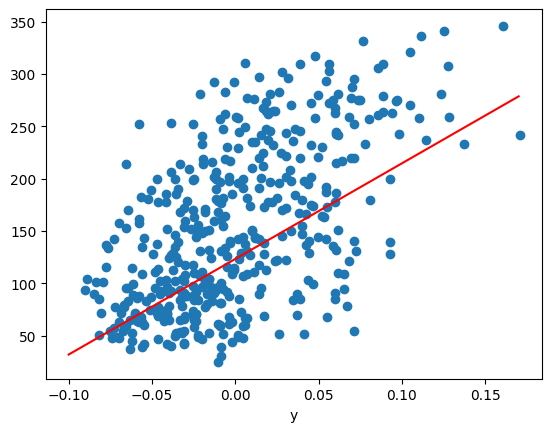

추정 w: 913.5973364346786
추정 b: 123.39414383177173


In [20]:
x = df['bmi'].values.tolist()
y = df['target'].values.tolist()

for i in range(100):
    for x_i, y_i in zip(x,y) :
        y_hat = w*x_i + b
        w = w - (y_hat - y_i) * x_i #MSE를 w에 대해 미분한 식
        b = b - (y_hat - y_i) # MSE를 b에 대해 미분한 식

pt1 = (-0.1,-0.1*w+b) # 회귀선의 시작 (x,y) 좌표
pt2 = (0.17,0.17*w+b) # 회귀선의 끝(x,y) 좌표

plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.scatter(df['bmi'],df['target'])
plt.xlabel('x')
plt.xlabel('y')
plt.show()

print('추정 w:', w)
print('추정 b:',b)

# 단변량 데이터의 Linear Regression
- 사이킷 런 라이브러리 활용
- https://scikit-learn.org

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1) 데이터 준비
x = np.array([1,3,2,4,7,4,9,2,3,2,6,3,2,7])
# ML에서는 학습 및 예측시 독립변수의 값이 vector의 형태로 입력되어야한다.
x = x.reshape(-1,1) # x = np.expand_dims(x,axis=1) #(10,) --> (10,1)
print(x)
y = np.array([3,9,6,7,10,6,12,2,4,3,8,5,3,8])

# 2) 모델 준비
model = LinearRegression()

# 3) 학습(fitting)
model.fit(x,y) # y = wx + b 선형식 적합

# 4 ) 평가
r_square = model.score(x,y)
print('R square:',r_square)

# 5 ) 예측
x_new = x[7].reshape(-1,1) # 예측에 사용될 새로운 값
y_hat = model.predict(x_new)
print('예측값: ',y_hat)
print('실제값: ' ,y[7])



[[1]
 [3]
 [2]
 [4]
 [7]
 [4]
 [9]
 [2]
 [3]
 [2]
 [6]
 [3]
 [2]
 [7]]
R square: 0.7464899534461854
예측값:  [4.05433746]
실제값:  2
